In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

import scipy.io as sio
from motiflets.plotting import *
import matplotlib as mpl

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

path = "../../motiflets_use_cases/chains/"

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [458]:
def read_penguin_data():
    series = pd.read_csv(path + "penguin.txt", 
                         names=(["X-Acc", "Y-Acc", "Z-Acc",
                                 "4", "5", "6",
                                 "7", "Pressure", "9"]),
                         delimiter="\t", header=None)
    ds_name = "Penguins"
    return ds_name, series

In [678]:
def plot_data(data, motifsets=None, motif_length=None, dists=None):
    fig, axes = plt.subplots(1, 1, squeeze=False, figsize=(10, 5))
    
    data_index, data_raw = ml.pd_series_to_numpy(data)
    
    offset = 0
    tick_offsets = []
    axes[0, 0].set_title(ds_name, fontsize=20)
    
    for dim in range(data_raw.shape[0]):
        dim_data_raw = zscore(data_raw[dim])
        offset -= 3*(np.max(dim_data_raw) - np.min(dim_data_raw))
        tick_offsets.append(offset)
    
        _ = sns.lineplot(x=data_index,
                         y=dim_data_raw + offset,
                         ax=axes[0, 0],
                         linewidth=1,
                         color=sns.color_palette("tab10")[0],
                         )
        sns.despine()
        
        if motifsets is not None:
            pos = motifsets[dim, 0]
            x1, y1 = (np.mean(data_index[np.arange(pos, pos + motif_length)]), 
                     np.max(dim_data_raw[pos:pos + motif_length]) + offset)

        
            for a, pos in enumerate(motifsets[dim]):
                _ = sns.lineplot(ax=axes[0, 0],
                                 x=data_index[
                                     np.arange(pos, pos + motif_length)],
                                 y=dim_data_raw[
                                   pos:pos + motif_length] + offset,
                                 linewidth=2,
                                 color=sns.color_palette("tab10")[a+1],
                                 ci=None,
                                 legend=True,
                                 estimator=None)

                #if (a == 1) or (a == len(motifsets[dim])-1):
                #    order = np.argsort(dists[:, motifsets[:, a]].sum(axis=0))
                #    axes[0, 0].annotate(str(1+order[dim]), # ".: {:.2f}".format(dists[dim, pos])
                #            xy=(np.mean(data_index[np.arange(pos, pos + motif_length)]), 
                #                np.max(dim_data_raw[pos:pos + motif_length]) + offset),
                #            xytext=(0, 4),
                #            textcoords='offset points',
                #            ha='center', va='bottom')


                x2, y2 = (np.mean(data_index[np.arange(pos, pos + motif_length)]), 
                        np.max(dim_data_raw[pos:pos + motif_length]) + offset)

                if x2 > x1:
                    connectionstyle="arc3, rad=0.2"
                else:
                    connectionstyle="arc3, rad=-0.2"

                if a > 0:
                    axes[0, 0].annotate("", # str(a)+"-NN",
                        xy=(x1, y1), xycoords='data',
                        xytext=(x2, y2), textcoords='data',
                        arrowprops=dict(arrowstyle="<-", color="0.5",
                                        # shrinkA=0.15, shrinkB=0.15,
                                        patchA=None, patchB=None,
                                        connectionstyle=connectionstyle,
                                        ),
                        # bbox=dict(pad=0, facecolor="none", edgecolor="none")                                    
                        )
                
    
                    #axes[0, 0].annotate(str(a)+"-NN", # ".: {:.2f}".format(dists[dim, pos])
                    #        xy=(np.mean(data_index[np.arange(pos, pos + motif_length)]), 
                    #            np.min(dim_data_raw[pos:pos + motif_length]) + offset),
                    #        xytext=(0, -10),
                    #        textcoords='offset points',
                    #        ha='center', va='bottom')
                    

    # plt.legend(title='NN', loc='upper right', labels=['1-NN', '2-NN'])
    # plt.legend()
    if isinstance(data, pd.DataFrame):
        axes[0, 0].set_yticks(np.array(tick_offsets))
        axes[0, 0].set_yticklabels(data.index, fontsize=12)

    sns.despine()
    fig.tight_layout()
    return fig, axes
    

(<Figure size 720x360 with 1 Axes>,
 array([[<AxesSubplot:title={'center':'Penguins'}>]], dtype=object))

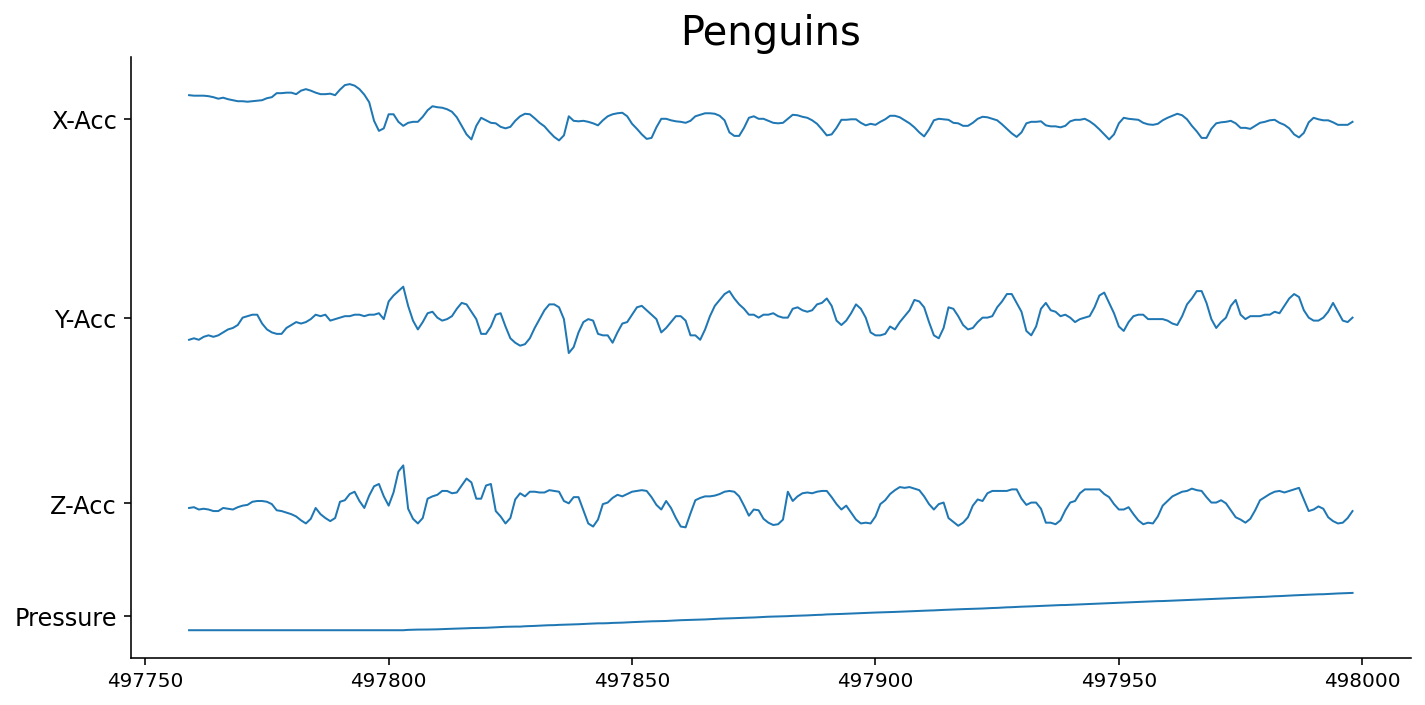

In [679]:
ds_name, series = read_penguin_data()
series = series.iloc[497699 + 60: 497699 + 300, [0,1,2,7]].T
plot_data(series)

In [680]:
motif_length = 22
D, knns = ml.compute_distance_matrix(series.values, motif_length, 3, sum_dims=False)

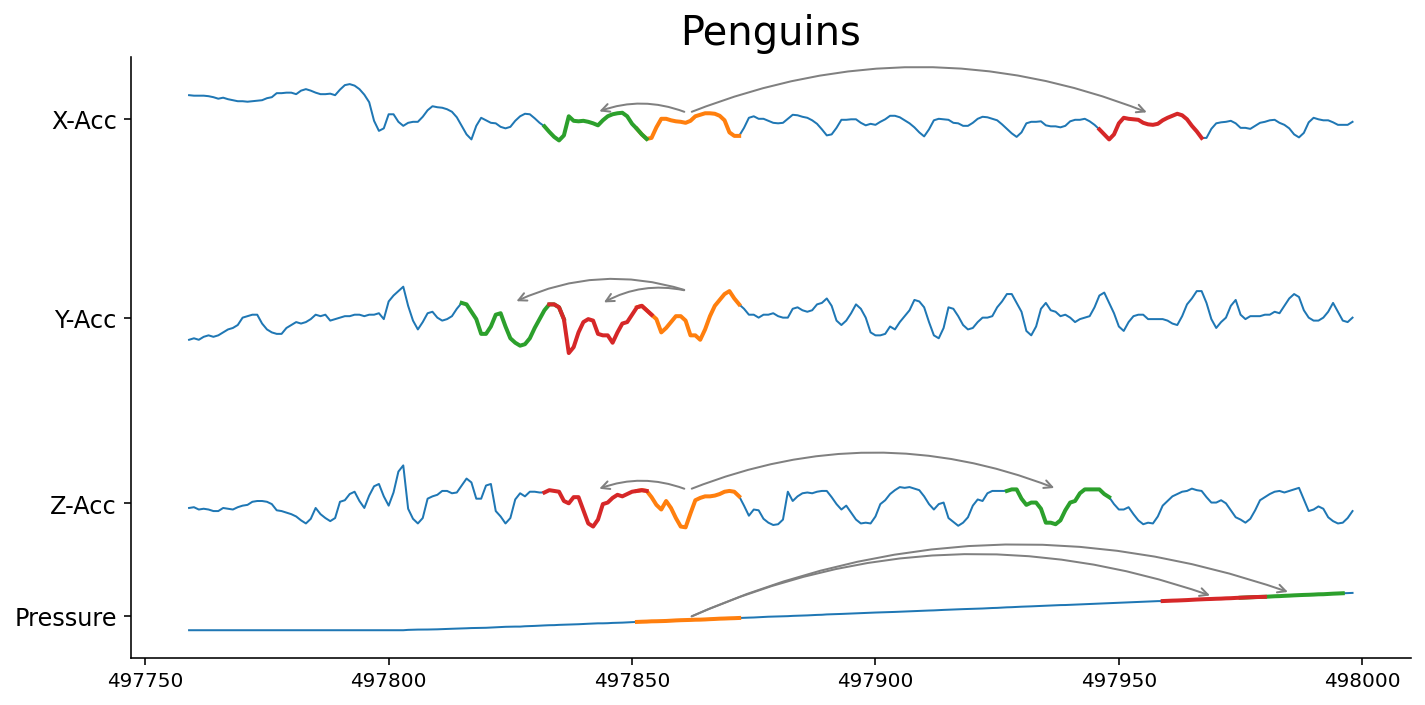

In [681]:
offset = 92
fig, ax = plot_data(series, knns[:, offset, :], motif_length, D[:, offset, :])
plt.savefig("images/choosing_dimension.pdf")

In [677]:
# np.argsort(D[:, offset, knns[:, offset, 3]].sum(axis=0))